In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings

from ipywidgets import interact, interactive, FloatSlider

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import cross_validation as cv
from sklearn.grid_search import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', 55)

# Pull in Labeled Data from Clustering

In [3]:
#read in csv with final clusters
df_clusters = pd.read_csv("indicators_clustered_completed.csv")

In [4]:
features = df_clusters[['violent_crime_rate', 
                          'murder_manslaughter', 
                          'rape', 
                          'robbery', 
                          'aggravated_assault',
                          'property_crime_rate',
                          'burglary','larceny_theft',
                          'motor_vehicle_theft',
                          'total_crime_rate',
                          'median_gross_rent',
                          'median_monthly_mortgage',
                          'rent_burden',
                          'mortgage_burden',
                          'income_change_2012_to_2014',
                          'median_age_of_men','median_age_of_women',
                          'median_age',
                          'median_household_income',
                          'single_men_population',
                          'single_women_population',
                          'ratio_of_single_men_to_single_women',
                          'population_percent_of_single_men',
                          'population_percent_of_single_women',
                          'population',
                          'edu_average_scale_score',
                          'pct_laccess_pop10',
                          'pct_laccess_lowi10',
                          'pct_laccess_child10',
                          'pct_laccess_seniors10',
                          'pct_laccess_hhnv10',
                          'event_mpmt',
                          'fatalities_mpmt',
                          'injuries_mpmt',
                          'walk_score',
                          'transit_score',
                          'bike_score',
                          'unemploymentrate',
                          'employment',
                          'laborforce'
                              ]]

labels = df_clusters['cluster']

# Perform Regularization Techniques

In [5]:
"""Perform Regularization Techniques for feature selection"""

def Regularization():
    regularization_models = [Lasso(),Ridge(),ElasticNet()]

    Reg_len = len(regularization_models)

    i=0
    while i < Reg_len:
        model = regularization_models[i]
        model.fit(features, labels)
        print regularization_models[i]
        print(list(zip(features, model.coef_.tolist())))
        print ('')

        sfm = SelectFromModel(model)
        sfm.fit(features, labels)
        print(list(features[sfm.get_support(indices=True)]))
        print ('')

        expected = labels
        predicted = model.predict(features)

        # Evaluate fit of the model
        print "Mean Squared Error: %0.3f" % mse(expected, predicted)
        print "Mean Absolute Error: %0.3f" % mae(expected, predicted)
        print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)
        print ('')

        i = i + 1
        
Regularization()

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[('violent_crime_rate', 0.008685317217976277), ('murder_manslaughter', 0.0), ('rape', 0.0025820786528743664), ('robbery', 0.028733440979288552), ('aggravated_assault', -0.01608712857042035), ('property_crime_rate', -0.0032948565337599456), ('burglary', -0.0008527761741058298), ('larceny_theft', -0.0004782045938990724), ('motor_vehicle_theft', -0.00021521647904189129), ('total_crime_rate', 0.003040549970833898), ('median_gross_rent', 0.0005354229463395854), ('median_monthly_mortgage', -0.0009567167326828036), ('rent_burden', 0.0), ('mortgage_burden', 0.0), ('income_change_2012_to_2014', 0.0), ('median_age_of_men', 0.0), ('median_age_of_women', 0.01948359026881801), ('median_age', 0.0), ('median_household_income', 4.1867988998085356e-05), ('single_men_population', -1.0476136807375185e-05), ('single_w

In [6]:
"""Identify best Coefficient of Determination (r2) score"""

def Max_r2():
    alpha_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

    """Try LASSO"""
    Lasso_alpha_r2 = []
    k=0
    while k < len(alpha_range):
        LassoInstance = Lasso(alpha=alpha_range[k])
        LassoInstance.fit(features, labels)

        expected = labels
        predicted = LassoInstance.predict(features)

        r2_calc = r2_score(expected, predicted)
        Lasso_alpha_r2.append(r2_calc)

        k=k+1

    print ('Lasso')
    print max(Lasso_alpha_r2)

    """Try Ridge"""
    Ridge_alpha_r2 = []
    k=0
    while k < len(alpha_range):
        RidgeInstance = Ridge(alpha=alpha_range[k])
        RidgeInstance.fit(features, labels)

        expected = labels
        predicted = RidgeInstance.predict(features)

        r2_calc = r2_score(expected, predicted)
        Ridge_alpha_r2.append(r2_calc)

        k=k+1

    print ('Ridge')
    print max(Ridge_alpha_r2)

    """Try Elastic Net"""
    EN_alpha_r2 = []
    k=0
    while k < len(alpha_range):
        ElasticNetInstance = ElasticNet(alpha=alpha_range[k])
        ElasticNetInstance.fit(features, labels)

        expected = labels
        predicted = ElasticNetInstance.predict(features)

        r2_calc = r2_score(expected, predicted)
        EN_alpha_r2.append(r2_calc)

        k=k+1

    print ('ElasticNet')
    print max(EN_alpha_r2)
    
Max_r2()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


Lasso
0.244479592025
Ridge
0.249707983059


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


ElasticNet
0.244479592025


# Perform Linear Discriminant Analysis

In [7]:
"""The scores from the Regularization techniques were poor. Moving to Linear Discriminant Analysis"""
"""Perform Linear Discriminant Analysis to identify most predictive features for use in a Classification model"""

def Perform_LDA():
    #n_range is features -1
    n_range= range(1,39)
    param_grid = dict(n_components=n_range)

    #instantiate the model
    lda = LDA()

    #instantiate GridSearch and set the scoring metric
    grid = GridSearchCV(lda, param_grid, cv=10, scoring='f1_weighted')

    #fit the model
    grid.fit(features, labels)
    
    print grid.best_score_
    print grid.best_params_
    print grid.best_estimator_
    
Perform_LDA()

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
//anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.863463160254
{'n_components': 1}
LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


In [8]:
#re-instantiate the model using the best parameter of n_components=1
lda = LDA(n_components=1)
new_features = lda.fit(features, labels).transform(features)

#identify the most predictive features
sfm = SelectFromModel(lda)
sfm.fit(features, labels)
print(list(features[sfm.get_support(indices=True)]))

['murder_manslaughter', 'ratio_of_single_men_to_single_women', 'population_percent_of_single_women', 'pct_laccess_seniors10', 'fatalities_mpmt', 'unemploymentrate']


# Perform Visualizations

//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


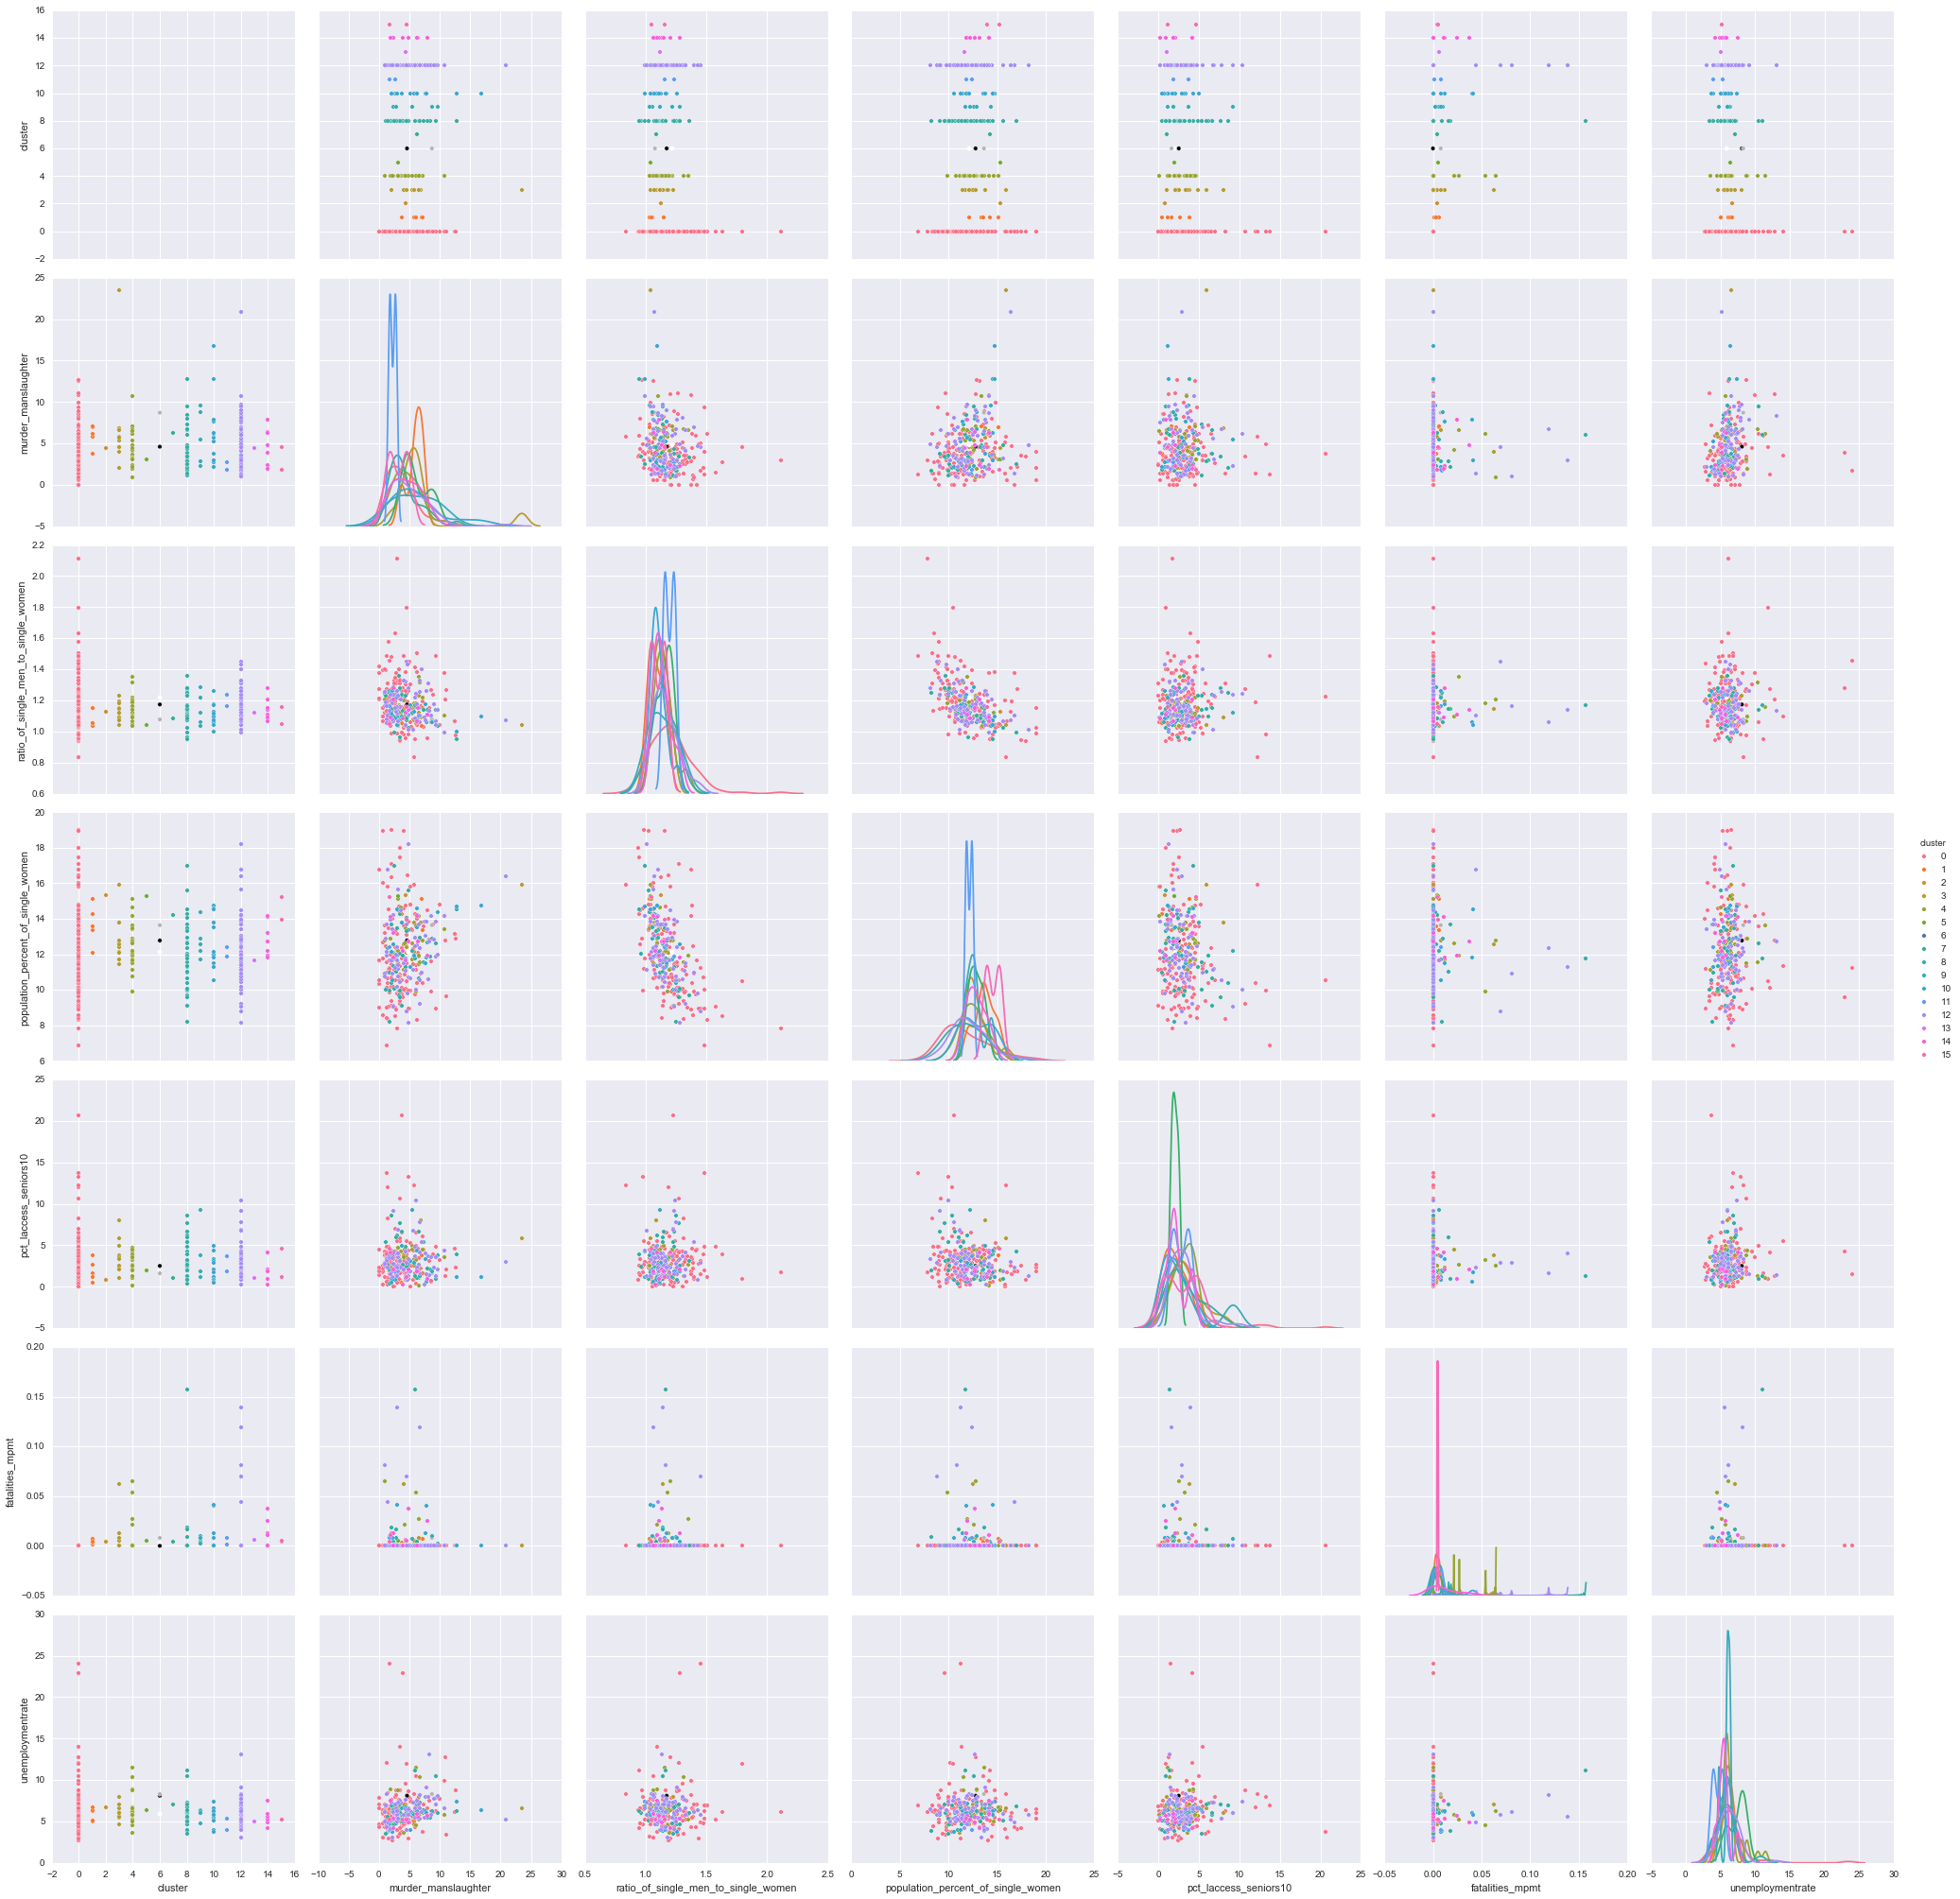

In [9]:
"""Use visualizations to better understand the data using the LDA-determined predictive features."""

#create new data frame with only the LDA-determined predictive features
df_features_lda = df_clusters[['cluster',
                               'murder_manslaughter',
                               'ratio_of_single_men_to_single_women',
                               'population_percent_of_single_women',
                               'pct_laccess_seniors10',
                               'fatalities_mpmt',
                               'unemploymentrate']]

#create pairplot to visualize the data
sns.pairplot(df_features_lda, hue='cluster', diag_kind='kde', size=4)

# Classification Model Selection

In [10]:
#Create a new feature set with only the LDA-determined features
features_lda = df_clusters[['murder_manslaughter',
                           'ratio_of_single_men_to_single_women',
                           'population_percent_of_single_women',
                           'pct_laccess_seniors10',
                           'fatalities_mpmt',
                           'unemploymentrate']]

#Identify Classifier Models
clf_models = [RandomForestClassifier(),
              DecisionTreeClassifier(),
              KNeighborsClassifier(),
              GaussianNB(),
              AdaBoostClassifier(),
              LinearSVC(),
              LogisticRegression()]

In [11]:
def Classifiers(features):

    K=0
    while K < len(clf_models):
        model = clf_models[K]
        model.fit(features, labels)
        print(model)

        expected = labels
        predicted = model.predict(features)

        print(classification_report(expected, predicted))
        #print(confusion_matrix(expected, predicted))

        K = K + 1
    
Classifiers(features_lda)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       134
          1       1.00      1.00      1.00         5
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00        11
          4       1.00      1.00      1.00        21
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00        33
          9       1.00      1.00      1.00         5
         10       0.93      1.00      0.96        13
      

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
             precision    recall  f1-score   support

          0       0.68      0.10      0.17       134
          1       0.00      0.00      0.00         5
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00        11
          4       0.00      0.00      0.00        21
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         1
          8       0.11      0.82      0.20        33
          9       0.12      1.00      0.21         5
         10       0.00      0.00      0.00        13
         11       0.00      0.00      0.00         2
         12       0.33      0.02      0.03        59
         13       0.00      0.00      0.00         1
         14       0.00      0.00      0.00         8
         15       0.00   

# Classification Model Evaluation - Perform Hyperparameter Tuning

In [12]:
#DecisionTree and RandomForest classifiers performed well, the others did not.
#Perform hyperparameter tuning.

#Define parameter grids for both classifiers
param_grid_RF = {"max_depth": [3, None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

param_grid_DT = {"max_depth": [3, None],
              "criterion": ['gini', 'entropy']}


#Use GridSearchCV for Decision Trees
def Grid_Search(clf_model, features, param_grid):

    grid = GridSearchCV(clf_model, param_grid, cv=10, scoring='f1_weighted')
    grid.fit(features, labels)

    print grid.best_score_
    print grid.best_params_
    print grid.best_estimator_
    
Grid_Search(RandomForestClassifier(), features_lda, param_grid_RF)
Grid_Search(DecisionTreeClassifier(), features_lda, param_grid_DT)

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.354169159316
{'bootstrap': True, 'criterion': 'gini', 'max_depth': None}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.32501565695
{'criterion': 'gini', 'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [13]:
#Because there are some clusters with only 1 instance, Grid Search cross validation returned a warning.
#Because of the poor scores and the warning, going to try Test/Train split.

#Use Test/Train Split Model Evaluation

def Test_Train(features):
    X = features
    y = labels

    X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.4)

    K=0
    while K < len(clf_models):
        model = clf_models[K]
        model.fit(X_train, y_train)
        print(model)

        expected = y_test
        predicted = model.predict(X_test)

        print(classification_report(expected, predicted))
        #print(confusion_matrix(expected, predicted))

        K = K + 1
        
Test_Train(features_lda)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

          0       0.56      0.78      0.65        54
          1       0.00      0.00      0.00         3
          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00         8
          6       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         0
          8       0.20      0.07      0.10        15
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         6
         11       0.00      0.00      0.00         2
         12       0.08      0.11      0.09        18
      

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
             precision    recall  f1-score   support

          0       0.46      1.00      0.63        54
          1       0.00      0.00      0.00         3
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00         8
          6       0.00      0.00      0.00         1
          8       0.00      0.00      0.00        15
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         6
         11       0.00      0.00      0.00         2
         12       0.00      0.00      0.00        18
         14       0.00      0.00      0.00         5
         15       0.00      0.00      0.00         1

avg / total       0.21      0.45      0.28       120

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     inte

In [14]:
"""Since the Model Evaluation scores were poor for both GridSearchCV and Test/Train split, /
perform Model Selection and Train Test split Model Evaluation on ALL features."""

#Model Selection
Classifiers(features)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       134
          1       1.00      1.00      1.00         5
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00        11
          4       1.00      1.00      1.00        21
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00        33
          9       1.00      1.00      1.00         5
         10       1.00      1.00      1.00        13
      

In [15]:
#Model Evaluation using Test/Train split
Test_Train(features)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        54
          1       1.00      0.50      0.67         2
          3       0.38      0.75      0.50         4
          4       0.64      0.78      0.70         9
          6       0.00      0.00      0.00         2
          8       0.69      0.75      0.72        12
          9       0.00      0.00      0.00         3
         10       1.00      1.00      1.00         4
         11       0.00      0.00      0.00         2
         12       0.91      0.83      0.87        24
         14       1.00      0.33      0.50         3
      

In [16]:
#The models performed much better when using all of the features. 
#Use GridSearch for hyperparameter tuning of the highest scoring models from the Test/Train split evaluation
#RandomForest, DecisionTree, KNeighbors

k_range= range(1,39)
weight_options = ['uniform','distance']
param_grid_KNN = dict(n_neighbors=k_range, weights=weight_options)


Grid_Search(RandomForestClassifier(), features, param_grid_RF)
Grid_Search(DecisionTreeClassifier(), features, param_grid_DT)
Grid_Search(KNeighborsClassifier(), features, param_grid_KNN)

0.88447805834
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None}
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.917482862816
{'criterion': 'entropy', 'max_depth': None}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.962420634921
{'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')


In [17]:
#K Nearest Neighbors peformed the best with an F1 score of 0.962 with parameters n_neighbors of 8 and weights of distance.
#n_neighbors of 1 indicates that a model does not generalize well to out of sample data and is likely not very predictive 

final_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=8, p=2,
                                   weights='distance')

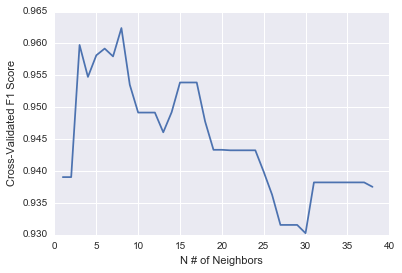

In [18]:
#Plot the F1 score as a function of the number of neighbors
def Plot_Final():
    param_grid_KNN_plot = dict(n_neighbors=k_range)
    
    grid_plot = GridSearchCV(final_model, param_grid=param_grid_KNN_plot, cv=10, scoring='f1_weighted')
    grid_plot.fit(features, labels)
    
    scores = [g[1] for g in grid_plot.grid_scores_]

    plt.plot(k_range, scores)
    plt.xlabel('N # of Neighbors')
    plt.ylabel('Cross-Validated F1 Score')
    
Plot_Final()

# Use Interactive Widgets to Collect Inputs and Predict MSA to User

In [19]:
#Create a dictionary for each Cluster with the 5 MSAs closest to the cluster centroid for use in user application.
reader = csv.reader(open('MSA_by_cluster.csv', 'r'))
dictionary = {}
for row in reader:
    k, v = row
    dictionary[int(k)] = v
    
print dictionary

{0: 'Saginaw MI Metro Area , Hilo HI Micro Area , Gainesville GA Metro Area , Panama City FL Metro Area , Daphne-Fairhope-Foley AL Metro Area ', 1: 'Philadelphia-Camden-Wilmington PA-NJ-DE-MD Metro Area , Miami-Fort Lauderdale-West Palm Beach FL Metro Area , Washington-Arlington-Alexandria DC-VA-MD-WV Metro Area , Houston-The Woodlands-Sugar Land TX Metro Area , Atlanta-Sandy Springs-Roswell GA Metro Area ', 2: 'Los Angeles-Long Beach-Anaheim CA Metro Area ', 3: 'San Juan-Carolina-Caguas PR Metro Area , San Antonio-New Braunfels TX Metro Area , Sacramento--Roseville--Arden-Arcade CA Metro Area , Cincinnati OH-KY-IN Metro Area , Orlando-Kissimmee-Sanford FL Metro Area ', 4: 'Greenville-Anderson-Mauldin SC Metro Area , Albuquerque NM Metro Area , Bakersfield CA Metro Area , Knoxville TN Metro Area , Oxnard-Thousand Oaks-Ventura CA Metro Area ', 5: 'New York-Newark-Jersey City NY-NJ-PA Metro Area ', 6: 'Detroit-Warren-Dearborn MI Metro Area , Riverside-San Bernardino-Ontario CA Metro Area

In [20]:
#Determines cluster # based on user inputs through iPyWidgets and assigns the top 5 MSAs to the Cluster Centroid
def model(Population, Employment, Walkability, Rent_Burden, Single_Men_to_Women):
    
    MeanbyFeature = features.describe()
    
    NEW_DATA = MeanbyFeature.iloc[[1]]
    NEW_DATA['population'] = Population
    NEW_DATA['employment'] = Employment
    NEW_DATA['walk_score'] = Walkability
    NEW_DATA['rent_burden'] = Rent_Burden
    NEW_DATA['ratio_of_single_men_to_single_women'] = Single_Men_to_Women
     
    model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
               metric_params=None, n_jobs=1, n_neighbors=1, p=2,
               weights='uniform')
    model.fit(features, labels)

    expected = labels
    predicted = model.predict(NEW_DATA)
    
    if predicted == 0:
        print ' Saginaw MI Metro Area \n Hilo HI Micro Area \n Gainesville GA Metro Area \n Panama City FL Metro Area \n Daphne-Fairhope-Foley AL Metro Area'
    elif predicted == 1:
        print ' Philadelphia-Camden-Wilmington PA-NJ-DE-MD Metro Area \n Miami-Fort Lauderdale-West Palm Beach FL Metro Area \n Washington-Arlington-Alexandria DC-VA-MD-WV Metro Area \n Houston-The Woodlands-Sugar Land TX Metro Area \n Atlanta-Sandy Springs-Roswell GA Metro Area'
    elif predicted == 2:
        print ' Los Angeles-Long Beach-Anaheim CA Metro Area'
    elif predicted == 3:
        print ' San Juan-Carolina-Caguas PR Metro Area \n San Antonio-New Braunfels TX Metro Area \n Sacramento--Roseville--Arden-Arcade CA Metro Area \n Cincinnati OH-KY-IN Metro Area \n Orlando-Kissimmee-Sanford FL Metro Area'
    elif predicted == 4:
        print ' Greenville-Anderson-Mauldin SC Metro Area \n Albuquerque NM Metro Area \n Bakersfield CA Metro Area \n Knoxville TN Metro Area \n Oxnard-Thousand Oaks-Ventura CA Metro Area'
    elif predicted == 5:
        print ' New York-Newark-Jersey City NY-NJ-PA Metro Area'
    elif predicted == 6:
        print ' Detroit-Warren-Dearborn MI Metro Area \n Riverside-San Bernardino-Ontario CA Metro Area \n Phoenix-Mesa-Scottsdale AZ Metro Area'
    elif predicted == 7:
        print ' Chicago-Naperville-Elgin IL-IN-WI Metro Area'
    elif predicted == 8:
        print ' Toledo OH Metro Area \n Deltona-Daytona Beach-Ormond Beach FL Metro Area \n Lakeland-Winter Haven FL Metro Area \n Ogden-Clearfield UT Metro Area \n Wichita KS Metro Area'
    elif predicted == 9:
        print ' Tampa-St. Petersburg-Clearwater FL Metro Area \n St. Louis MO-IL Metro Area \n Baltimore-Columbia-Towson MD Metro Area \n Denver-Aurora-Lakewood CO Metro Area \n San Diego-Carlsbad CA Metro Area'
    elif predicted == 10:
        print ' Hartford-West Hartford-East Hartford CT Metro Area \n Raleigh NC Metro Area \n New Orleans-Metairie LA Metro Area \n Louisville/Jefferson County KY-IN Metro Area \n Salt Lake City UT Metro Area'
    elif predicted == 11:
        print ' Seattle-Tacoma-Bellevue WA Metro Area \n Minneapolis-St. Paul-Bloomington MN-WI Metro Area'
    elif predicted == 12:
        print ' Salisbury MD-DE Metro Area \n Peoria IL Metro Area \n Salem OR Metro Area \n Beaumont-Port Arthur TX Metro Area \n Savannah GA Metro Area'
    elif predicted == 13:
        print ' Dallas-Fort Worth-Arlington TX Metro Area '
    elif predicted == 14:
        print ' Nashville-Davidson--Murfreesboro--Franklin TN Metro Area \n Virginia Beach-Norfolk-Newport News VA-NC Metro Area \n Indianapolis-Carmel-Anderson IN Metro Area \n San Jose-Sunnyvale-Santa Clara CA Metro Area \n Austin-Round Rock TX Metro Area'
    elif predicted == 15:
        print ' Boston-Cambridge-Newton MA-NH Metro Area \n San Francisco-Oakland-Hayward CA Metro Area'
    else:
        print "Please Make a Selection"

In [21]:
POPx = FloatSlider(min=features.population.min(),max=features.population.max())
EMPLMNTx = FloatSlider(min=features.employment.min(),max=features.employment.max())
WALKx = FloatSlider(min=features.walk_score.min(),max=features.walk_score.max())
RENTx = FloatSlider(min=features.rent_burden.min(),max=features.rent_burden.max())
SINGLEx = FloatSlider(min=features.ratio_of_single_men_to_single_women.min(),max=features.ratio_of_single_men_to_single_women.max())

# Indicate Preferences to Find Recommended MSA

In [22]:
warnings.filterwarnings('ignore')
interactive(model, 
            Population=POPx, 
            Employment=EMPLMNTx, 
            Walkability=WALKx, 
            Rent_Burden=RENTx,
            Single_Men_to_Women=SINGLEx)

 Saginaw MI Metro Area 
 Hilo HI Micro Area 
 Gainesville GA Metro Area 
 Panama City FL Metro Area 
 Daphne-Fairhope-Foley AL Metro Area
